In [46]:
# Imports
from IPython.display import Image
from IPython.display import Video
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import aeon.io.api as api
from aeon.schema.dataset import exp02, exp01
from aeon.schema import octagon
from aeon.analysis.utils import visits, distancetravelled

<span style="color:#0775b5">

# PROJECT AEON

### A Ph. D Upgrade Presentation by Jai Bhagat

</span>

The beginning of my presentation

<center><img src="Outline.png" width="1000"/></center>

<span style="color:#075aeb">

### Introduction

</span>

- Why and how should we study naturalistic, ethological behavior?

<span style="color:#d16004">

### Methods

</span>

- Engineering solutions for studying this behavior.

<span style="color:#82817a">

### Neuroscience

</span>

- Preliminary data from long-term single-animal, and short-term multi-animal recordings.

<span style="color:#f0b002">
    
### Future Directions

</span>

- Enhancing the platform and answering specific Neuroscience questions.

<img src="Introduction.png" width="1000"/>

### Introduction
  - Constraints of the classical systems neuroscience approach in studying naturalistic, ecological behavior.
  - Aeon: an alternative model.
  - Challenges faced in long-term, continuous recordings.
  

<img src="ethological_behavior.png" width="700"/>

**Classical Systems Neuroscience**

**(Trial-based Experiments)**
<br>
| | _Pros_ | _Cons_ |
|-|--------|--------|
| | Narrow-focused, controlled conditions can target a specific animal behavior. | These conditions are often unnatural and by definition cannot capture most of an animal's behavioral repertoire. |
| | Trial repetition within and across animals increases statistical power of results. | Trial-based structure limits unsupervised methods that can find more latent and/or novel results. |
| | Standardization of trial-based tasks can be crucial for reproducibility. | Standardizing these tasks is not always trivial, and even just the training of animals can often take weeks or months.
|
| | Short-term experimental designs can lead to more precise temporal study of specific neural circuits. | These designs may not adequately capture the dynamics of neural processes that unfold over longer timescales. |

Suppose you are a systems neuroscientist interested studying naturalistic, ecological behavior. In particular, suppose you are interested in social behaviour and continual learning, in the context of foraging. 

**Aeon: An experimental paradigm for running long-term, continuous recordings**

**of animals in naturalistic environments**

Development Lifecycle: 
1) Broadly define research question(s) of interest
2) Build general-purpose hardware and software tools to help answer these questions
3) Iteratively refine and narrow focus as necessary


<span style="color:#0651c9">

## Scientific Requirements

</span>

<img src="scientific_requirements.png" width="800"/>

<span style="color:#0651c9">

## Technical Requirements

</span>

<img src="technical_requirements.png" width="800"/>

Main Challenges:
1) Creating a Naturalistic Environment
2) Stability of Experiment Control and Data Acquisition
3) Animal Welfare
4) Data Management
5) Data Visualization and Analysis

TODO Add obligatory AutoGPT video for here :)

## Aeon Subgroup Structure

<img src="subgroup_structure.png" width="1200"/>

- map challenges to subgroups

TODO Add Acknowledgements slide here

<img src="Methods.png" width="1000"/>

### Methods for Solving Challenges in Continuous, Long-term Experiments
- Challenge 1: Creating a Modular, Naturalistic Environment
- Challenge 2: Stability of Experiment Control and Data Acquisition
- Challenge 3: Animal Welfare
- Challenge 4: Data Management
- Challenge 5: Data Visualization and Analysis 

## Challenge 1: Creating a Modular, Naturalistic Environment


### Arenas

- Comprised of modular, hexagonal patches
- ~2.6 $m^2$ (180 cm diameter) 
- 37 (19 fully accessible) patches, each ~1150 $cm^2$
- Matte acrylic flooring and semi-transparent red acrylic walls
- Up to 6 nests enclosing the arena provide ad lib access to water and homecage materials


<img src="arena_modular.png" width="500"/>

<img src="arena_whole.png" width="500"/>

<center><img src="arena_b2.png" width="500" align="center"/></center>
 

### Patches
- Contain a wheel and underground feeder
- A magnet and magnetic encoder are used to measure wheel distance via changing magnetic field strength
- Feeders contain a hopper filled with 20 $ug$ pellets 
- Feeders are controlled via a Raspberry Pi Pico serving as a HARP device, running micropython
- Power specs: 12V?, ?A

<img src="feeder_cartoon.png" width="500"/>

<img src="pellet_delivery.gif" width="600"/>

### Lighting
- Specs of IR LEDs
- Fully controllable room lights for simulating day/night light cycle
- TODO: add pictures of lighting and video of light control

- Add pictures of lights
- Add video of light control

## Challenge 2: Stability of Experiment Control and Data Acquisition


- Current Arena Acquisition Devices
    - 9 USB Blackfly S 3 Cameras (1.6 MP up to 220 FPS)
    - 2 USB Dodotronic Ultramic UM250K Ultrasonic Microphones
    - 3 USB Harp Expander Output Boards
        - For recording patch data
    - 6 USB ID-20LA 125 kHz USB RFID Readers

<img src="devices.png" width="800"/>

### TODO wiring diagram for B2

### TODO Experiment Control

- A focus on modularity and reusability for both hardware and software implementations: creating plug-and-play, open-source tools
- Bonsai: Advantageous of asynchronous, reactive framework over typical state-machine, procedural frameworks
- Design to limiting dependency blocking
    - Limit the total number of additional physical and virtual changes necessary for any given device change
- Device QC
- Show Bonsai workflow snippets?
- Discuss aeon.acquisition package?

### Solving time-alignment with Harp + Bonsai

<img src="harp.png" width="800"/>

- Mention Harp heartbeat
- Deviation between devices < 100 us

## Challenge 3: Animal Welfare

### Alerts System

- Alert notifications sent via webhooks through Microsoft Teams
    - Animal alerts: Activity, Weight, _Online Behaviour Classification (e.g. Fighting)_ 
    - System alerts: 
        - Hardware device issues (e.g. dropped frames, non-responsive feeders) 
        - Software issues (e.g. abnormal system usage, storage capacity, lost synchronization)

### Video Tracking

- Online multianimal tracking via SLEAP in Bonsai
- Continuous multianimal tracking pipeline
    - TODO show schematic: Pose centroid via SLEAP in Bonsai -> Processed data into DB -> Manual curation of labels -> Retrain SLEAP network -> Automatic upload of new retrained SLEAP network in Bonsai

In [1]:
%%HTML
<iframe width="800" height="600" src="https://www.youtube.com/embed/UoBI0gtFRVA?start=100" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

### Weight Tracking

- Scale embedded in nest reliably tracks weight over weeks
- TODO show code to generate figure for weight fluctuation over weeks with pellet deliveries + ethogram

## Challenge 4: Data Management

<img src="say_big_data.jpg" width="700"/>

### How much data?

- Given our current devices: ~700 gb / 24 hours
- With continuous recording from 4 ephys probs: ~7 TB / 24 hours
    - (Though we may be able to get >2x lossless compression provided by the MTSCOMP library)

### Aeon Data Management Plan

### Aeon Data Pipelines

<img src="updated_aeon_pipelines.png" width="1000"/>

### Ceph Data Storage

<img src="data_storage.png" width="800"/>

### MySQL Relational Database 

In [3]:
import datajoint as dj
dj.config['database.host'] = 'aeon-db2'
dj.config['display.limit'] = 5  # rows per displayed table
dj.conn()
from aeon.dj_pipeline.analysis.in_arena import *
from aeon.dj_pipeline.acquisition import WeightMeasurement, ExperimentLog, ExperimentWeightScale, Chunk, Experiment, _device_schema_mapping
from aeon.dj_pipeline.report import *
from aeon.io import api as io_api
from aeon.dj_pipeline.utils.plotting import *

[2023-04-14 10:09:55,609][INFO]: Connecting jbhagat@aeon-db2:3306
[2023-04-14 10:09:55,650][INFO]: Connected jbhagat@aeon-db2:3306


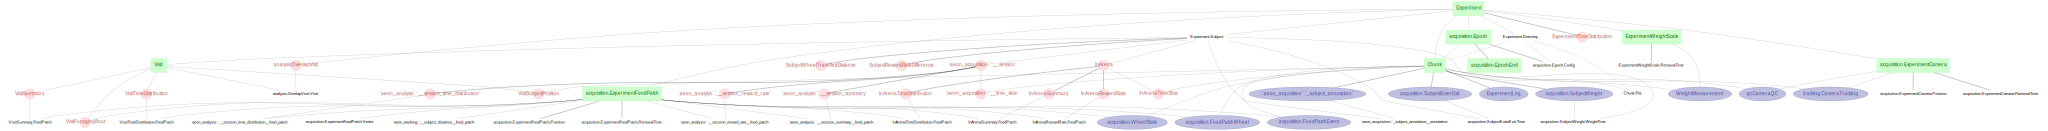

In [4]:
import warnings
warnings.filterwarnings('ignore')
dj.Diagram(Experiment) + 2
#warnings.simplefilter('always')

### Code Repository Structure

<img src="code_repos_structure.png" width="1400"/>

### Software Development Practices

- Iterative Software Development Lifecycle
- Testing via PyTest
- CI (_maybe CD?_) via GitHub Actions
- Online docs under construction

## Challenge 5: Data Visualization and Analysis

### Low-level Python API

#### Schemas

In [45]:
roots = [Path("/ceph/aeon/aeon/data/raw/AEON3/presocial0.1"), Path("/ceph/aeon/aeon/data/raw/AEON2/presocial0.1")]
if not np.all([path.exists() for path in roots]):
    print("Cannot find root paths. Check path names or connection.")
subject_events = api.load(roots, exp02.ExperimentalMetadata.SubjectState)
sessions = visits(subject_events[subject_events.id.str.startswith("BAA")])
display(sessions)

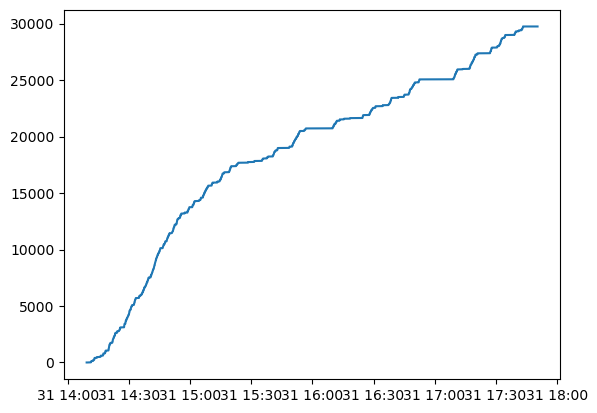

In [52]:
s = sessions.iloc[-1]
root = str(roots[1])
encoder1 = api.load(root, exp02.Patch1.Encoder, start=s.enter, end=s.exit)
w1 = -distancetravelled(encoder1.angle)
plt.plot(w1)

### Datajoint API

In [38]:
# Integration with new api, handling of multi-experiment types 
# (e.g. session single-animal, continous single-animal, session multi-animal)

dj.Diagram(Experiment) + 2
print(Experiment.heading)
print(Experiment.head)
print(Visit.heading)
print(Visit.head)

experiment_name      : char(12)                     # e.g exp0-a
---
experiment_start_time : datetime(6)                  # datetime of the start of this experiment
experiment_description : varchar(1000)                # 
arena_name           : varchar(32)                  # unique name of the arena (e.g. circular_2m)
lab                  : varchar(24)                  # Abbreviated lab name
location             : varchar(32)                  # 
experiment_type="foraging" : varchar(32)                  # 

<bound method QueryExpression.head of *experiment_name    experiment_start_time     experiment_description     arena_name     lab     location     experiment_type    
+-----------------+ +-----------------------+ +------------------------+ +------------+ +-----+ +----------+ +-----------------+
exp0.1-r0           2021-06-03 07:00:00       experiment 0.1             circle-2m      SWC     room-0       foraging           
exp0.2-r0           2022-02-22 09:00:00       experiment 0.2 - 

### Web Interfaces

- [Dashboard](192.168.134.1:7777)
- [Sci-viz](https://www.swc.ucl.ac.uk/aeon/login)

<img src="Neuroscience.png" width="1000"/>

- Preliminary Findings
    - Long-term Individual Foraging
    - Acute Social Foraging
- Planned Experiments
    - Long-term Social Foraging 
    - Continual Learning and Generalization

In [2]:
root_exp01 = '/ceph/aeon/aeon/data/raw/AEON/experiment0.1'
root_exp02 = '/ceph/aeon/aeon/data/raw/AEON2/experiment0.2'
# find all "session" Start and End events
exp01_events = api.load(root_exp01, exp01.SessionData)
exp02_events = api.load(root_exp02, exp02.ExperimentalMetadata.SubjectState)
print(exp01_events.head())
print(exp02_events.head())

                                        id  weight  event
time                                                     
2021-06-03 08:37:52.918399811  BAA-1099790    25.2  Start
2021-06-03 13:18:41.202020168  BAA-1099790    26.9    End
2021-06-03 13:49:49.323520184  BAA-1099794    21.9  Start
2021-06-03 18:01:51.744060040  BAA-1099794    26.2    End
2021-06-04 07:46:35.178850174  BAA-1099790    24.9  Start
                               weight   event     id
time                                                
2022-02-17 14:07:33.641499996   200.0  Remain  Dario
2022-02-17 14:08:09.863490105   200.0  Remain  Dario
2022-02-17 14:09:26.629499912   200.0  Remain  Dario
2022-02-17 14:10:20.787489891   200.0  Remain  Dario
2022-02-17 14:16:09.889500141   200.0  Remain  Dario


<img src="Future_Directions.png" width="1000"/>

### Future Directions
  - Electrophysiology
  - Platform Enhancements

## Electrophysiology

- OpenEphys Onix Headstages for Neuropixels 2!
- Early results from Kalman filter assisted computer vision for automatic commutation

In [ ]:
exp01_sessions = exp01_events[exp01_events.id.str.startswith('BAA')]  # take only proper sessions
if len(exp01_sessions) % 2 != 0:                                      # if number of sessions don't pair up
    exp01_sessions = exp01_sessions.drop(exp01_sessions.index[-1])    # drop last session (might be ongoing)
print(exp01_sessions.head())
exp01_sessions = visits(exp01_sessions, onset='Start', offset='End')  # compute session duration


exp02_sessions = exp02_events[exp02_events.id.str.startswith('BAA')]              
if len(exp02_sessions) % 2 != 0:                                      
    exp02_sessions = exp02_sessions.drop(exp02_sessions.index[-1])    
print(exp02_sessions.head())
exp02_sessions = visits(exp02_sessions)

print(exp01_sessions.head())
print(exp02_sessions.head())

In [ ]:
pos_exp01_ses1 = api.load(root_exp01, exp01.FrameTop.Position, start=exp01_sessions.iloc[1].start, end=exp01_sessions.iloc[1].end)
pos_exp02_visit2 = api.load(root_exp02, exp02.CameraTop.Position, start=exp02_sessions.iloc[2].enter, end=exp02_sessions.iloc[2].exit)

print(pos_exp01_ses1.head())
print(pos_exp02_visit2.head())

## Datajoint Updates

## Fall / Winter Plans

- Extending analysis of multianimal experiments

	- Online multianimal tracking and pose estimation with ma-DLC and SLEAP

	- Adding 1) multianimal body part position and 2) behaviour classification data to database

- Brainstorming ephys pipelines

	- Preprocessing of ephys data (e.g. spikesorting and LFP band preprocessing)

	- Structuring ephys data in the database

- Adding a video streamer/viewer to web GUI

- Auto-ingestion of any new device data into the database

- Continuous, online device qc

- Updating experiment metadata files

- Datajoint + pyrat integration